In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/
%pwd

In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
#import visuals as vs

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [ ]:
dataset = pd.read_csv('housing.csv')
print(dataset)
print(dataset.shape,"\n")

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
5    6.430   5.21     18.7  602700.0
6    6.012  12.43     15.2  480900.0
7    6.172  19.15     15.2  569100.0
8    5.631  29.93     15.2  346500.0
9    6.004  17.10     15.2  396900.0
10   6.377  20.45     15.2  315000.0
11   6.009  13.27     15.2  396900.0
12   5.889  15.71     15.2  455700.0
13   5.949   8.26     21.0  428400.0
14   6.096  10.26     21.0  382200.0
15   5.834   8.47     21.0  417900.0
16   5.935   6.58     21.0  485100.0
17   5.990  14.67     21.0  367500.0
18   5.456  11.69     21.0  424200.0
19   5.727  11.28     21.0  382200.0
20   5.570  21.02     21.0  285600.0
21   5.965  13.83     21.0  411600.0
22   6.142  18.72     21.0  319200.0
23   5.813  19.88     21.0  304500.0
24   5.924  16.30     21.0  327600.0
25   5.599  16.51     21.0  291900.0
2

In [ ]:
col_names = ['RM', 'LSTAT', 'PTRATIO', 'MEDV', 'label']

pima = pd.read_csv('housing.csv', header=None, names=col_names)
pima.head()

,RM,LSTAT,PTRATIO,MEDV,label
0,RM,LSTAT,PTRATIO,MEDV,NaN
1,6.575,4.98,15.3,504000.0,NaN
2,6.421,9.14,17.8,453600.0,NaN
3,7.185,4.03,17.8,728700.0,NaN
4,6.998,2.94,18.7,701400.0,NaN


In [ ]:
# separate the data and target attributes

housing_prices = dataset['MEDV']  #target
housing_features = dataset.drop('MEDV', axis = 1)   #feature


In [ ]:
# DATA PREPROCESSING

# normalize the data attributes
normalized_housing_features = preprocessing.normalize(housing_features)
print("Normalized Housing Feature:\n",normalized_housing_features)
print("\n")

# standardize the data attributes
standardized_housing_features = preprocessing.scale(housing_features)
print("Standardize Housing Feature:\n",standardized_housing_features)
print("\n");


Normalized Housing Feature:
 [[0.37827295 0.2865094  0.88023971]
 [0.30555106 0.43493796 0.84703454]
 [0.36632182 0.20546652 0.90751961]
 ...
 [0.30548513 0.24698052 0.91960832]
 [0.29534976 0.2816995  0.91291506]
 [0.25962086 0.33927236 0.90415224]]


Standardize Housing Feature:
 [[ 0.52055395 -1.1250769  -1.5250831 ]
 [ 0.28104837 -0.53706982 -0.33974768]
 [ 1.46924486 -1.25935736 -0.33974768]
 ...
 [ 1.14420158 -1.03178731  1.17748167]
 [ 0.86114953 -0.91305511  1.17748167]
 [-0.32704695 -0.71516812  1.17748167]]




In [ ]:
# DATA SUMMARIZATION

# Number of data points(houses)
number_of_houses = housing_features.shape[0]
print ("number of houses:",number_of_houses)

# Number of features
number_of_features = housing_features.shape[1]
print ("number of features:",number_of_features)

# Minimum and Maximum housing prices
max_price = np.max(housing_prices)
print ("max price of house:",max_price)
min_price = np.min(housing_prices)
print ("min price of house:",min_price)

# Mean and Median Boston housing prices
mean_price = np.mean(housing_prices)
print ("mean price of house:",mean_price)
median_price = np.median(housing_prices)
print ("median price of house:",median_price)

# Standard Deviation
standard_deviation = np.std(housing_prices)
print ("standard deviation for prices of house:",standard_deviation)


number of houses: 489
number of features: 3
max price of house: 1024800.0
min price of house: 105000.0
mean price of house: 454342.9447852761
median price of house: 438900.0
standard deviation for prices of house: 165171.13154429477


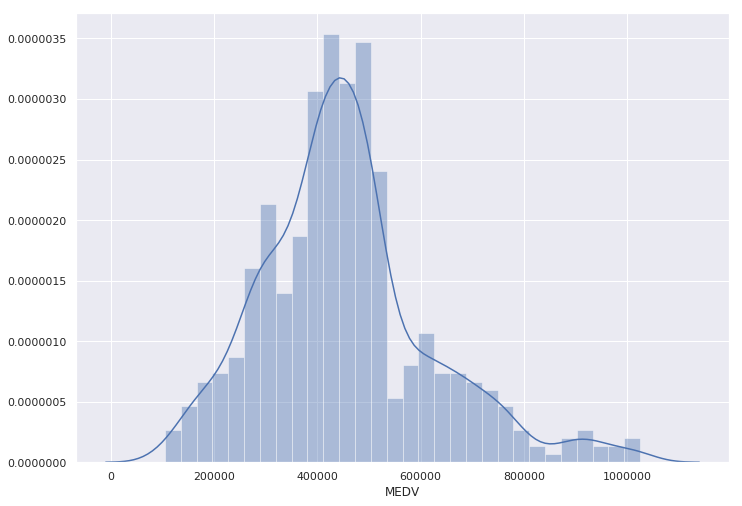

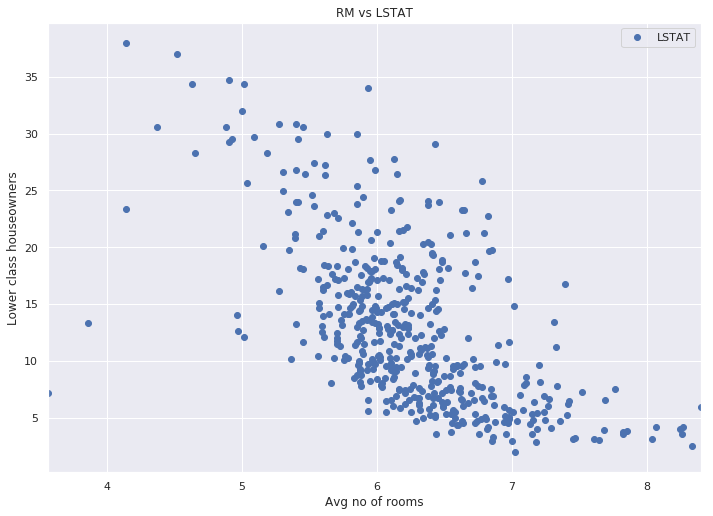

In [ ]:
#DATA VISUALIZATION

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['MEDV'], bins=30)
plt.show()

dataset.plot(x='RM', y='LSTAT', style='o')
plt.title('RM vs LSTAT')
plt.xlabel('Avg no of rooms')
plt.ylabel('Lower class houseowners')
plt.show()



In [ ]:
#Performance Matrix
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between
        true (y_true) and predicted (y_predict) values based on the metric chosen. """

    score = r2_score(y_true, y_predict)


    # Return the score

    return score


In [ ]:
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(housing_features, housing_prices, test_size=0.2, random_state = 42)
# Success
print("\nTraining and testing split was successful.")


Training and testing split was successful.


In [ ]:
#cross validation

#Fitting a model
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric(y_true, y_predict))

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_



In [ ]:
#Optimal model

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("\nParameter 'max_depth' is {} for the optimal model.\n".format(reg.get_params()['max_depth']))



Parameter 'max_depth' is 4 for the optimal model.



Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


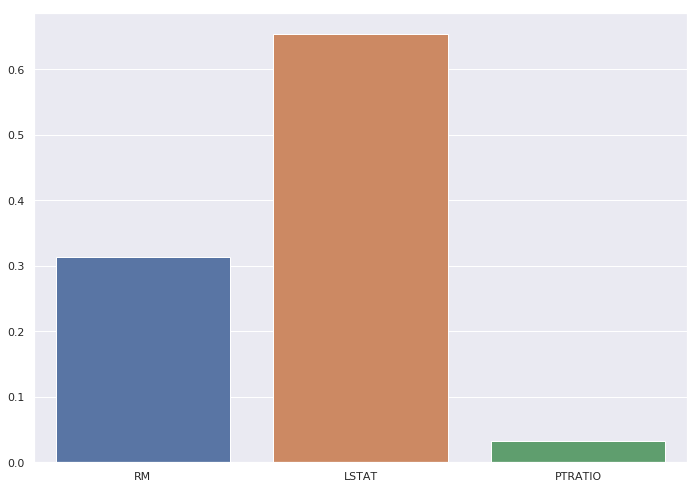

In [ ]:
#Predicting Selling Price

# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))


'''In tree based method we can use feature_importances to determine the most important
   features for the predictions (and understand how we got predicted prices) '''
sns.barplot(X_train.columns, reg.feature_importances_)
plt.show()



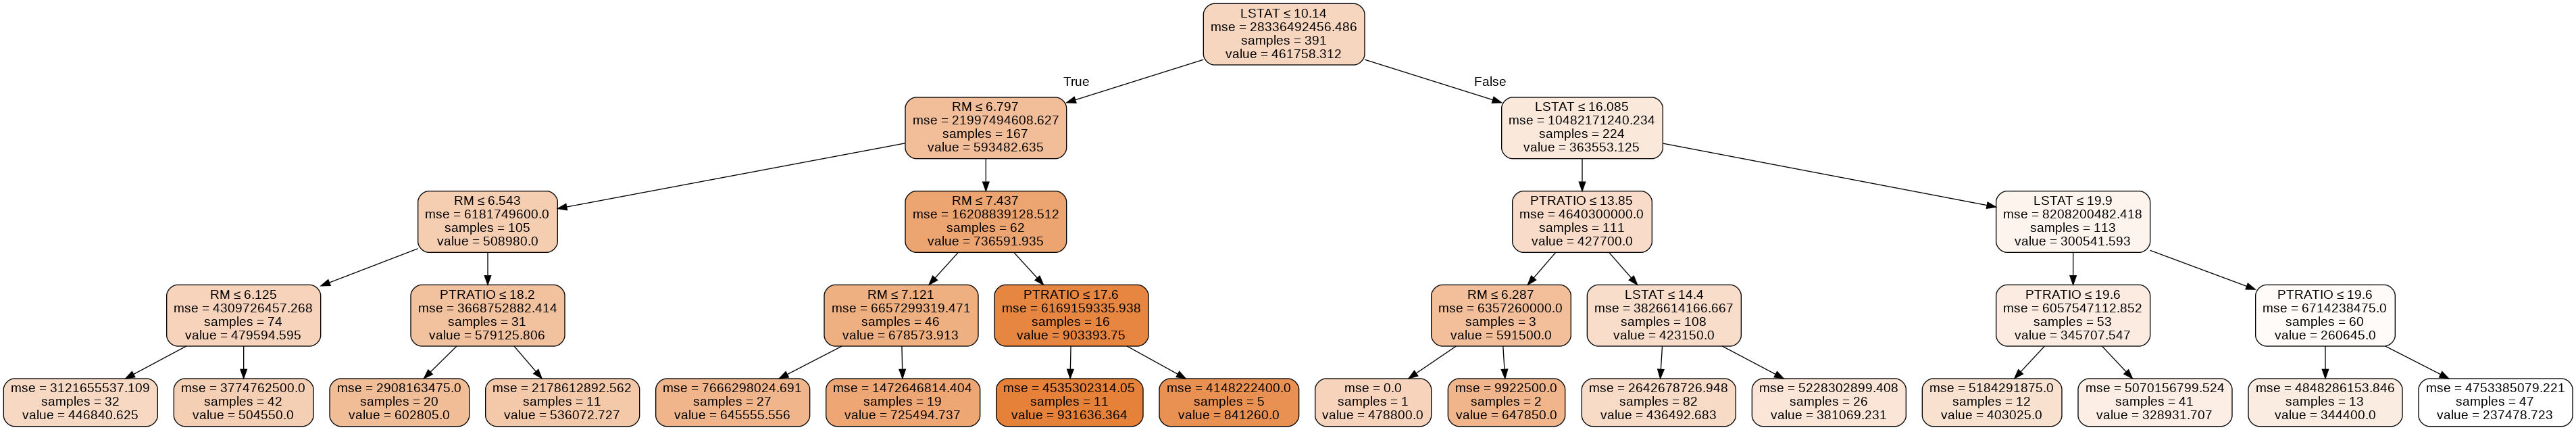

In [ ]:
#Visualize the exact tree with the use of export_graphviz

clf = DecisionTreeRegressor(max_depth=4)
clf = clf.fit(X_train, y_train)
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
    feature_names=X_train.columns,
    class_names="PRICES",
    filled=True, rounded=True,
    special_characters=True)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())